# 14.3 Zadanie: wizualizacja

In [2]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
diabetes = pd.read_csv('diabetes.csv')

In [4]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

In [5]:
def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))
    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1
    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)
    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))
    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)
    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)
    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')
    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):
        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)
        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)
    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)

In [7]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

In [8]:
c_param_values = [0.01, 0.5, 0.9, 5]

#### Reularyzacja l1 dla wszytkich wartości listy c_param_values

Penalty-l1 F1_score with C=0.01 Train: 0.5353233830845772
Penalty-l1 F1_score with C=0.01 Test: 0.5671752884257536


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


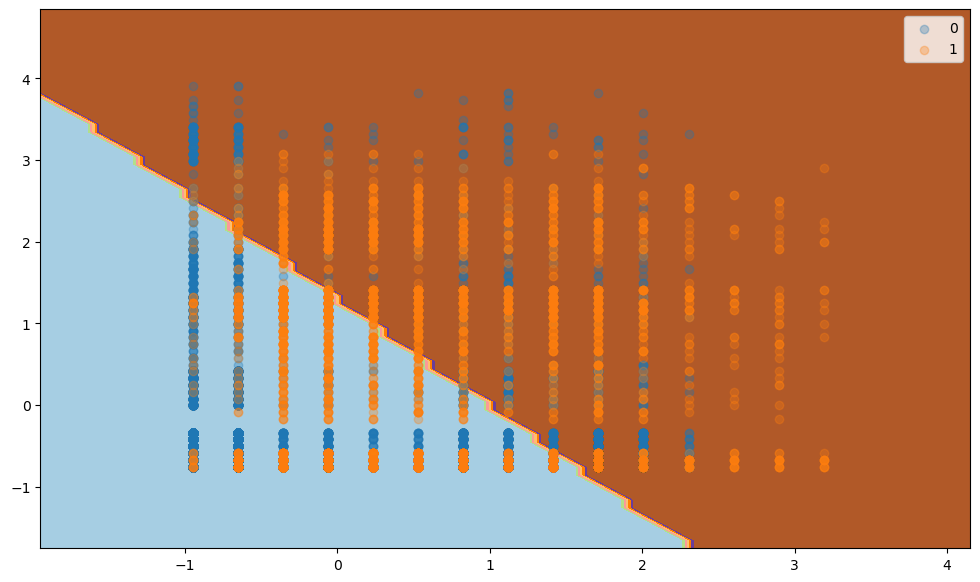

Penalty-l1 F1_score with C=0.5 Train: 0.5468775476928094
Penalty-l1 F1_score with C=0.5 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


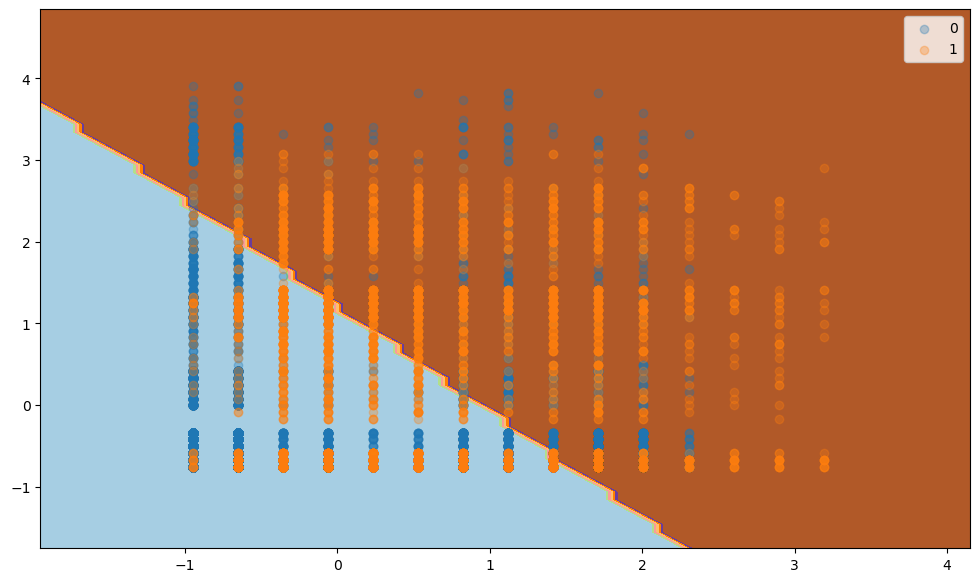

Penalty-l1 F1_score with C=0.9 Train: 0.5468775476928094
Penalty-l1 F1_score with C=0.9 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


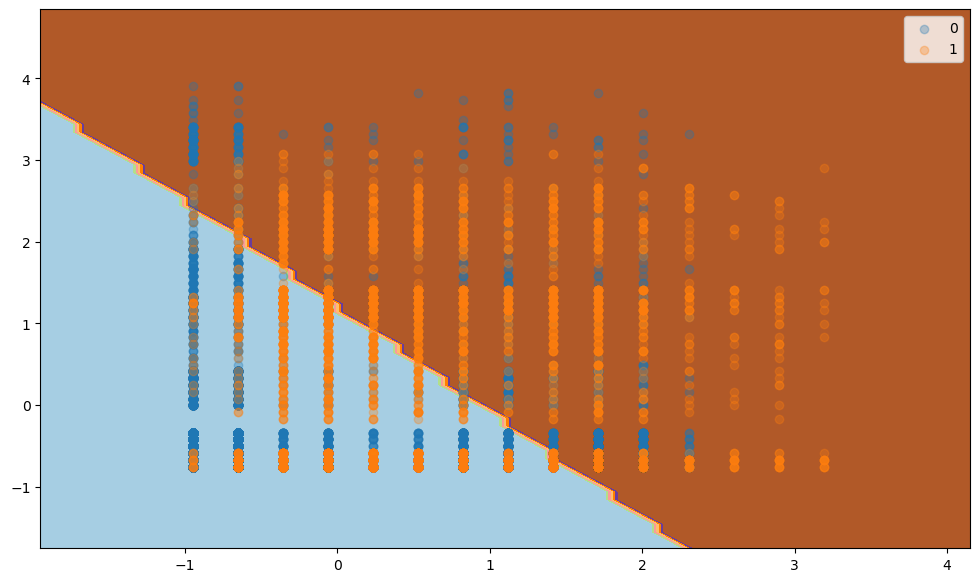

Penalty-l1 F1_score with C=5 Train: 0.5468775476928094
Penalty-l1 F1_score with C=5 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


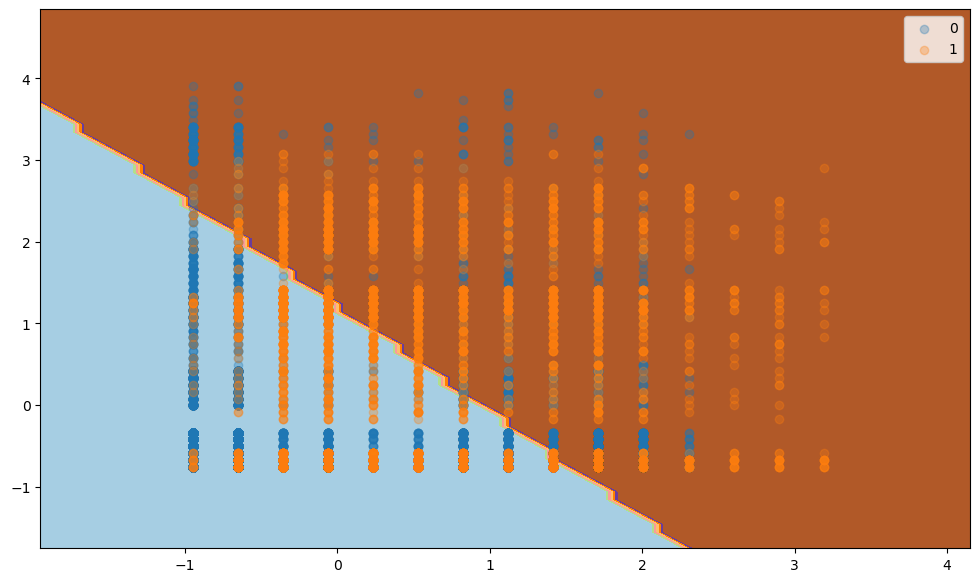

In [10]:
for c in c_param_values:
    model_lr_l1 = LogisticRegression(penalty='l1', solver='saga', C=c)
    model_lr_l1.fit(X_train_standardized, y_train)
    predictions_lr_test = model_lr_l1.predict(X_test_standardized)
    predictions_lr_train = model_lr_l1.predict(X_train_standardized)
    print(f"Penalty-l1 F1_score with C={c} Train:", f1_score(y_train, predictions_lr_train))
    print(f"Penalty-l1 F1_score with C={c} Test:", f1_score(y_test, predictions_lr_test))
    plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l1)

#### Reularyzacja l2 dla wszytkich wartości listy c_param_values

Penalty-l2 F1_score with C=0.01 Train: 0.5367549668874172
Penalty-l2 F1_score with C=0.01 Test: 0.5674972108590554


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


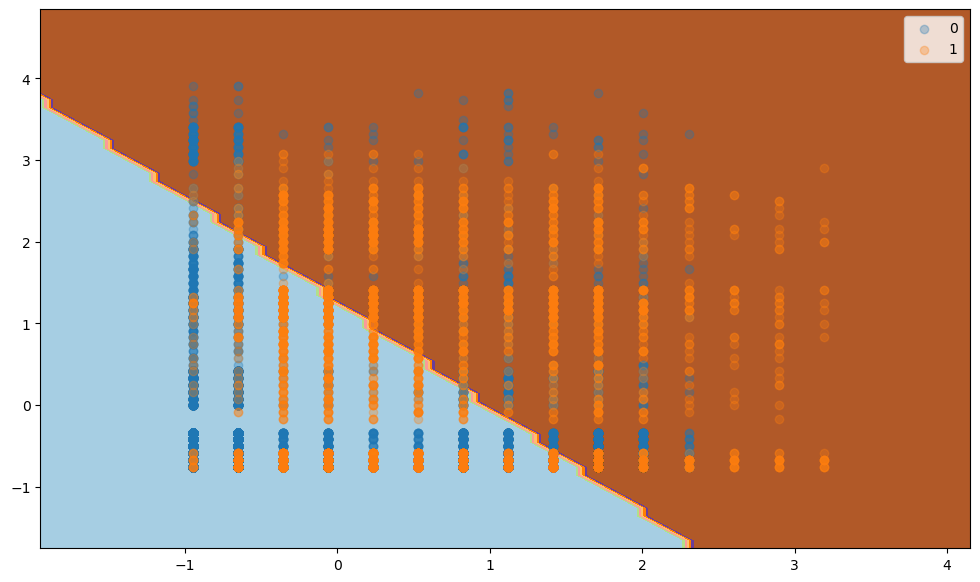

Penalty-l2 F1_score with C=0.5 Train: 0.5468775476928094
Penalty-l2 F1_score with C=0.5 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


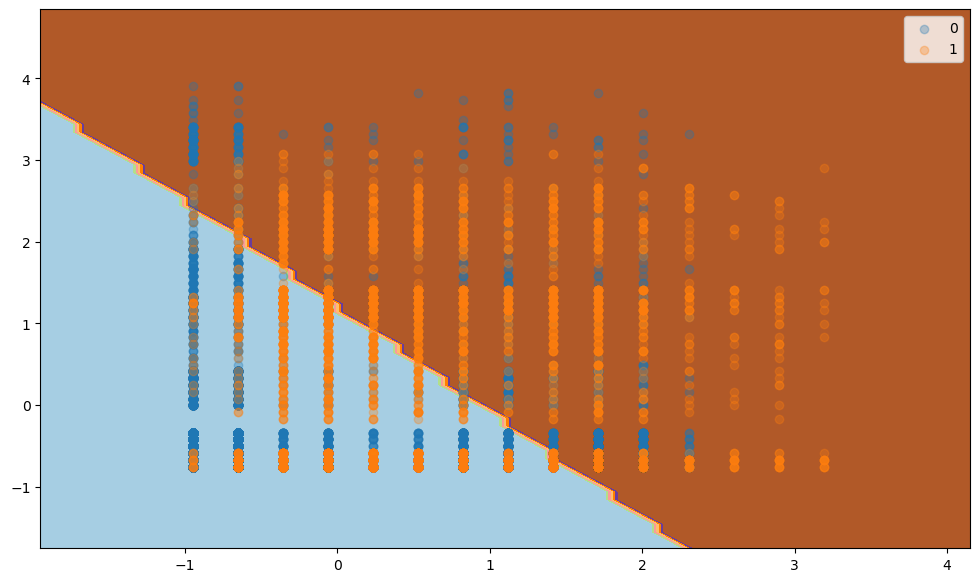

Penalty-l2 F1_score with C=0.9 Train: 0.5468775476928094
Penalty-l2 F1_score with C=0.9 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


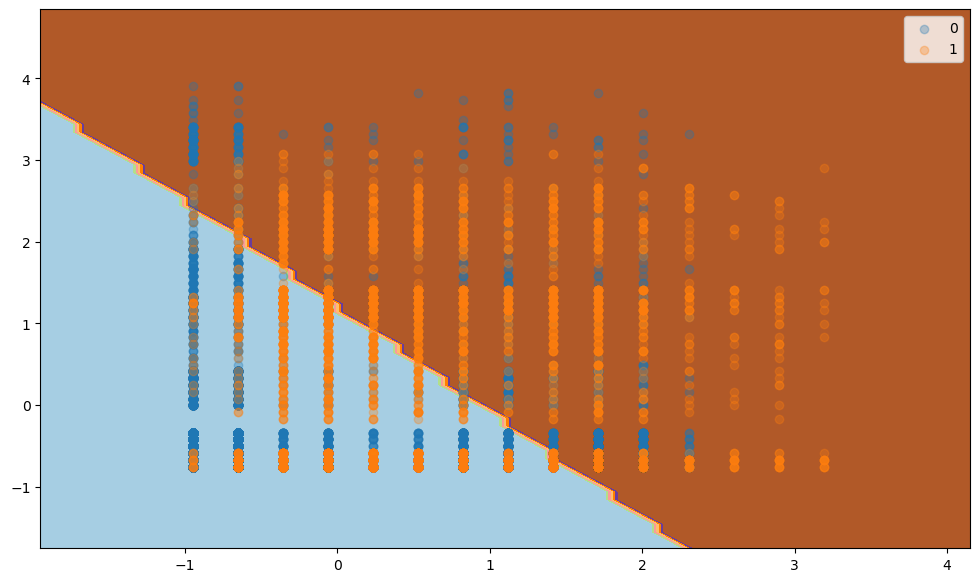

Penalty-l2 F1_score with C=5 Train: 0.5468775476928094
Penalty-l2 F1_score with C=5 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


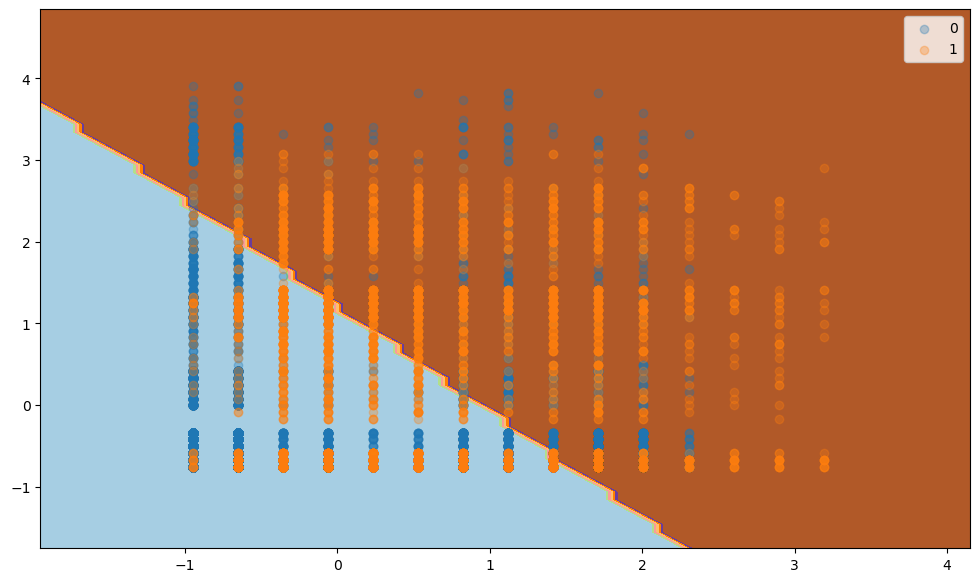

In [12]:
for c in c_param_values:
    model_lr_l2 = LogisticRegression(C=c)
    model_lr_l2.fit(X_train_standardized, y_train)
    predictions_lr_test = model_lr_l2.predict(X_test_standardized)
    predictions_lr_train = model_lr_l2.predict(X_train_standardized)
    print(f"Penalty-l2 F1_score with C={c} Train:", f1_score(y_train, predictions_lr_train))
    print(f"Penalty-l2 F1_score with C={c} Test:", f1_score(y_test, predictions_lr_test))
    plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l2)

#### Reularyzacja elasticnet dla wszytkich wartości listy c_param_values

Penalty-elasticnet F1_score with C=0.01 Train: 0.536779324055666
Penalty-elasticnet F1_score with C=0.01 Test: 0.5671752884257536


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


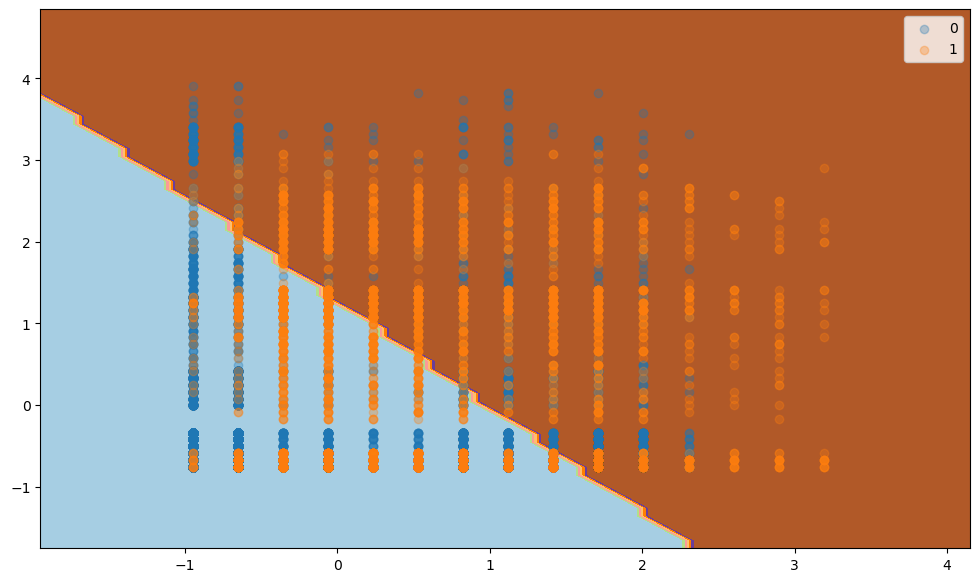

Penalty-elasticnet F1_score with C=0.5 Train: 0.5468775476928094
Penalty-elasticnet F1_score with C=0.5 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


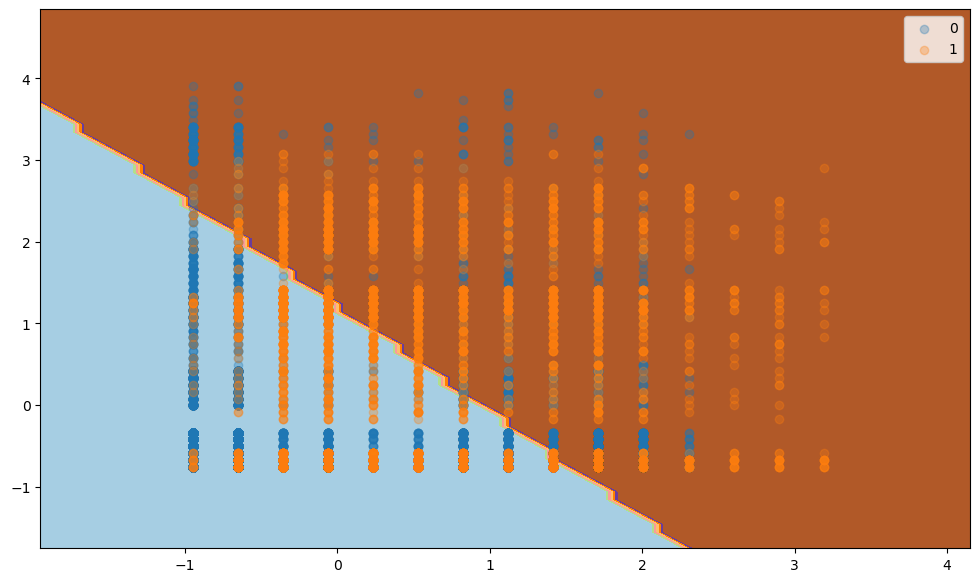

C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


Penalty-elasticnet F1_score with C=0.9 Train: 0.5468775476928094
Penalty-elasticnet F1_score with C=0.9 Test: 0.5809280233832663


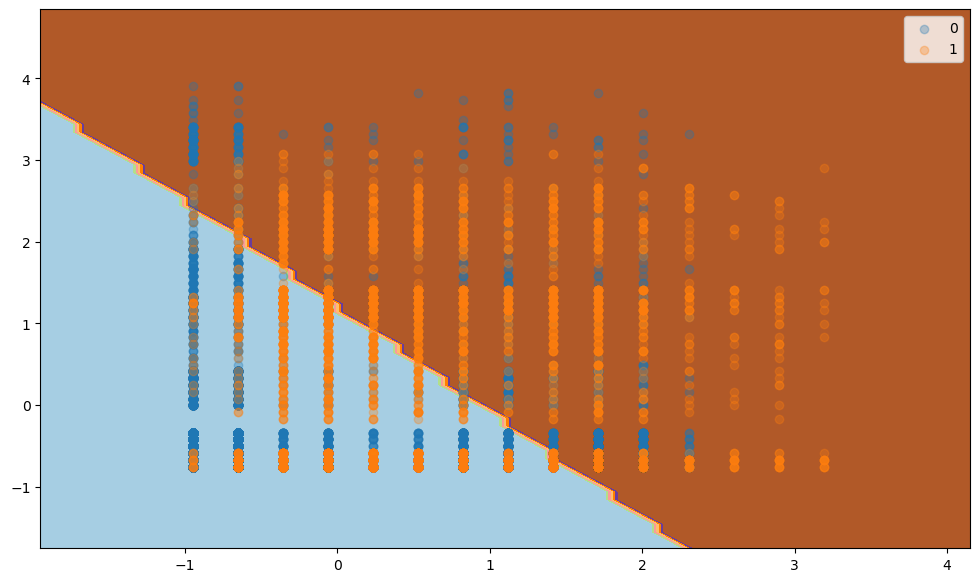

Penalty-elasticnet F1_score with C=5 Train: 0.5468775476928094
Penalty-elasticnet F1_score with C=5 Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


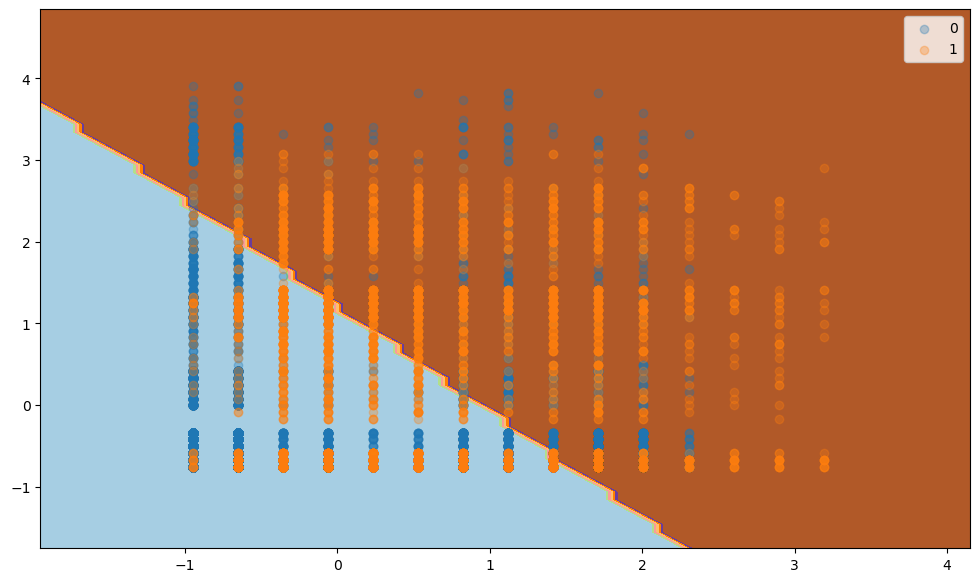

In [14]:
for c in c_param_values:
    model_lr_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', C=c, l1_ratio=0.5)
    model_lr_elasticnet.fit(X_train_standardized, y_train)
    predictions_lr_test = model_lr_elasticnet.predict(X_test_standardized)
    predictions_lr_train = model_lr_elasticnet.predict(X_train_standardized)
    print(f"Penalty-elasticnet F1_score with C={c} Train:", f1_score(y_train, predictions_lr_train))
    print(f"Penalty-elasticnet F1_score with C={c} Test:", f1_score(y_test, predictions_lr_test))
    plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_elasticnet)

#### Bez regularyzacji

Penalty-none F1_score Train: 0.5468775476928094
Penalty-none F1_score Test: 0.5809280233832663


C:\Users\piotr\AppData\Local\Temp\ipykernel_27744\85682220.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


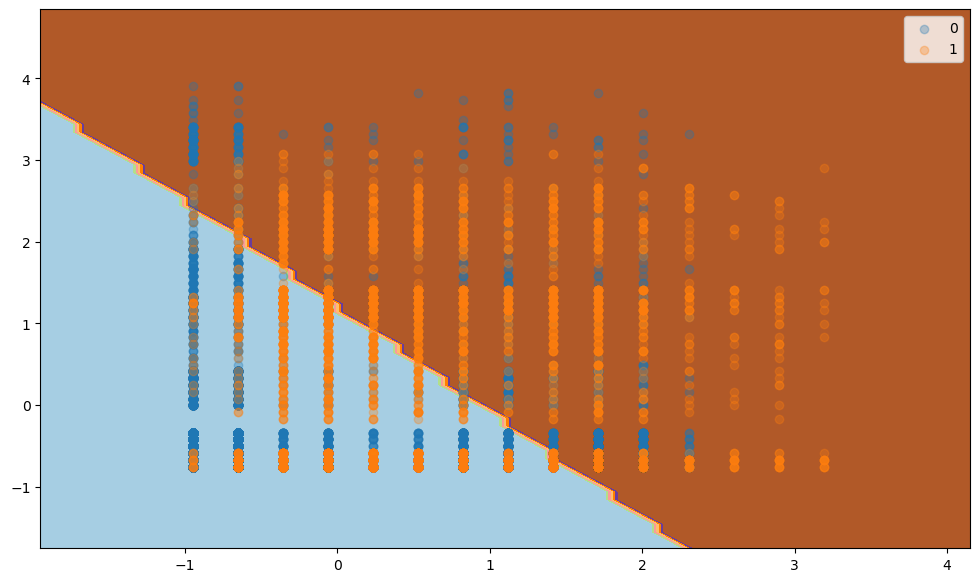

In [16]:
model_lr_none = LogisticRegression(penalty=None)
model_lr_none.fit(X_train_standardized, y_train)
predictions_lr_test = model_lr_none.predict(X_test_standardized)
predictions_lr_train = model_lr_none.predict(X_train_standardized)
print("Penalty-none F1_score Train:", f1_score(y_train, predictions_lr_train))
print("Penalty-none F1_score Test:", f1_score(y_test, predictions_lr_test))
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_none)